In [1]:
import os
import boto3
import re
import sagemaker


role = sagemaker.get_execution_role()
region = boto3.Session().region_name

# S3 bucket for training data.
# Feel free to specify a different bucket and prefix.
data_bucket = f"convscraper"
data_prefix = "sentiment"


# S3 bucket for saving code and model artifacts.
# Feel free to specify a different bucket and prefix
output_bucket = f"convscraper"
output_prefix = "notebooks"

In [2]:
import matplotlib

In [3]:
s3 = boto3.client("s3")

a19sentiment = "dfa19sentiment.csv"
a20sentiment = "dfa20sentiment.csv"
c19sentiment = "dfc19sentiment.csv"
c20sentiment = "dfc20sentiment.csv"

s3.download_file(data_bucket, f"{data_prefix}/{a19sentiment}", a19sentiment)
s3.download_file(data_bucket, f"{data_prefix}/{a20sentiment}", a20sentiment)
s3.download_file(data_bucket, f"{data_prefix}/{c19sentiment}", c19sentiment)
s3.download_file(data_bucket, f"{data_prefix}/{c20sentiment}", c20sentiment)

In [4]:
from tqdm import tqdm

In [5]:
import pandas as pd

dfa19 = pd.read_csv(a19sentiment)
dfa20 = pd.read_csv(a20sentiment)
dfc19 = pd.read_csv(c19sentiment)
dfc20 = pd.read_csv(c20sentiment)

In [6]:
dfa19.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
dfa20.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [7]:
del dfc19['Unnamed: 0']
del dfc20['Unnamed: 0']

In [8]:
happyat19 = dfa19['title_sentiment'].value_counts()[0]
depressedat19 = dfa19['title_sentiment'].value_counts()[1]

happyat20 = dfa20['title_sentiment'].value_counts()[0]
depressedat20 = dfa20['title_sentiment'].value_counts()[1]

In [9]:
depressed_percentat19 = round((depressedat19/(happyat19+depressedat19))*100, 4)
depressed_percentat20 = round((depressedat20/(happyat20+depressedat20))*100, 4)

In [10]:
happyab19 = dfa19['body_sentiment'].value_counts()[0]
depressedab19 = dfa19['body_sentiment'].value_counts()[1]

happyab20 = dfa20['body_sentiment'].value_counts()[0]
depressedab20 = dfa20['body_sentiment'].value_counts()[1]

In [11]:
depressed_percentab19 =  round((depressedab19/(happyab19+depressedab19))*100, 4)
depressed_percentab20 =  round((depressedab20/(happyab20+depressedab20))*100, 4)

In [12]:
happyc19 = dfc19['body_sentiment'].value_counts()[0]
depressedc19 = dfc19['body_sentiment'].value_counts()[1]

happyc20 = dfc20['body_sentiment'].value_counts()[0]
depressedc20 = dfc20['body_sentiment'].value_counts()[1]

In [13]:
depressed_percentc19 = round((depressedc19/(happyc19+depressedc19))*100, 4)
depressed_percentc20 = round((depressedc20/(happyc20+depressedc20))*100, 4)

In [14]:
print(f'Article titles with depressed emotions in 2019: \033[1m{depressed_percentat19}%\033[0m')
print(f'Article titles with depressed emotions in 2020: \033[1m{depressed_percentat20}%\033[0m')

Article titles with depressed emotions in 2019: 40.8626%
Article titles with depressed emotions in 2020: 41.6038%


In [15]:
print(f'Article bodies with depressed emotions in 2019: \033[1m{depressed_percentab19}%\033[0m')
print(f'Article bodies with depressed emotions in 2020: \033[1m{depressed_percentab20}%\033[0m')

Article bodies with depressed emotions in 2019: 45.9018%
Article bodies with depressed emotions in 2020: 45.7586%


In [16]:
print(f'Comments with depressed emotions in 2019: \033[1m{depressed_percentc19}%\033[0m')
print(f'Comments with depressed emotions in 2020: \033[1m{depressed_percentc20}%\033[0m')

Comments with depressed emotions in 2019: 40.0097%
Comments with depressed emotions in 2020: 40.9871%


In [17]:
unititles19 = round(dfa19.groupby(['subreddit'])['title_sentiment'].value_counts(3)*100, 3).sort_values(ascending=False)
print (f'{unititles19}')

subreddit         title_sentiment
brocku            happy              62.618
TrentUniversity   happy              60.360
uoguelph          happy              60.291
ryerson           happy              60.169
wlu               happy              60.037
UofT              happy              59.630
yorku             happy              59.332
queensuniversity  happy              59.270
CarletonU         happy              58.601
McMaster          happy              58.532
uwaterloo         happy              58.412
UTM               happy              57.484
                  depressed          42.516
uwaterloo         depressed          41.588
McMaster          depressed          41.468
CarletonU         depressed          41.399
queensuniversity  depressed          40.730
yorku             depressed          40.668
UofT              depressed          40.370
wlu               depressed          39.963
ryerson           depressed          39.831
uoguelph          depressed          39.70

In [18]:
unititles20 = round(dfa20.groupby(['subreddit'])['title_sentiment'].value_counts(3)*100, 3).sort_values(ascending=False)
print (f'{unititles20}')

subreddit         title_sentiment
brocku            happy              64.727
queensuniversity  happy              60.509
ryerson           happy              60.071
CarletonU         happy              59.890
wlu               happy              59.285
yorku             happy              58.810
uoguelph          happy              58.491
uwaterloo         happy              57.582
UTM               happy              57.450
TrentUniversity   happy              57.143
McMaster          happy              56.484
                  depressed          43.516
TrentUniversity   depressed          42.857
UTM               depressed          42.550
uwaterloo         depressed          42.418
uoguelph          depressed          41.509
yorku             depressed          41.190
wlu               depressed          40.715
CarletonU         depressed          40.110
ryerson           depressed          39.929
queensuniversity  depressed          39.491
brocku            depressed          35.27

In [19]:
unibodies19 = round(dfa19.groupby(['subreddit'])['body_sentiment'].value_counts(3)*100, 3).sort_values(ascending=False)
print (f'{unibodies19}')

subreddit         body_sentiment
CarletonU         depressed         66.076
uwaterloo         depressed         58.000
TrentUniversity   depressed         57.207
ryerson           depressed         54.312
queensuniversity  happy             53.090
UTM               depressed         53.007
uoguelph          depressed         52.209
UofT              depressed         51.501
wlu               happy             51.050
yorku             depressed         50.366
McMaster          depressed         50.334
brocku            happy             50.202
                  depressed         49.798
McMaster          happy             49.666
yorku             happy             49.634
wlu               depressed         48.950
UofT              happy             48.499
uoguelph          happy             47.791
UTM               happy             46.993
queensuniversity  depressed         46.910
ryerson           happy             45.688
TrentUniversity   happy             42.793
uwaterloo         hap

In [20]:
unibodies20 = round(dfa20.groupby(['subreddit'])['body_sentiment'].value_counts(3)*100, 3).sort_values(ascending=False)
print (f'{unibodies20}')

subreddit         body_sentiment
CarletonU         depressed         73.535
ryerson           depressed         66.343
uwaterloo         depressed         57.546
queensuniversity  depressed         54.798
brocku            happy             54.252
wlu               happy             52.472
McMaster          depressed         51.702
uoguelph          depressed         51.550
yorku             depressed         51.467
TrentUniversity   depressed         51.429
UTM               depressed         50.732
                  happy             49.268
TrentUniversity   happy             48.571
yorku             happy             48.533
uoguelph          happy             48.450
McMaster          happy             48.298
wlu               depressed         47.528
brocku            depressed         45.748
queensuniversity  happy             45.202
uwaterloo         happy             42.454
ryerson           happy             33.657
CarletonU         happy             26.465
Name: body_sentiment,

In [21]:
unicomments19 = round(dfc19.groupby(['subreddit'])['body_sentiment'].value_counts(3)*100, 3)
unicomments19.sort_values(ascending=False)

subreddit         body_sentiment
uoguelph          happy             63.664
wlu               happy             62.710
McMaster          happy             62.275
TrentUniversity   happy             62.136
queensuniversity  happy             61.730
CarletonU         happy             61.479
ryerson           happy             61.388
brocku            happy             60.458
UTM               happy             59.695
yorku             happy             59.022
UofT              happy             58.896
uwaterloo         happy             57.747
                  depressed         42.253
UofT              depressed         41.104
yorku             depressed         40.978
UTM               depressed         40.305
brocku            depressed         39.542
ryerson           depressed         38.612
CarletonU         depressed         38.521
queensuniversity  depressed         38.270
TrentUniversity   depressed         37.864
McMaster          depressed         37.725
wlu               dep

In [22]:
unicomments20 = round(dfc20.groupby(['subreddit'])['body_sentiment'].value_counts(2)*100, 3)
unicomments20.sort_values(ascending=False)

subreddit         body_sentiment
TrentUniversity   happy             65.190
brocku            happy             63.384
uoguelph          happy             62.512
CarletonU         happy             61.856
ryerson           happy             61.247
wlu               happy             61.098
McMaster          happy             60.616
queensuniversity  happy             59.114
yorku             happy             59.101
UTM               happy             59.066
uwaterloo         happy             56.333
                  depressed         43.667
UTM               depressed         40.934
yorku             depressed         40.899
queensuniversity  depressed         40.886
McMaster          depressed         39.384
wlu               depressed         38.902
ryerson           depressed         38.753
CarletonU         depressed         38.144
uoguelph          depressed         37.488
brocku            depressed         36.616
TrentUniversity   depressed         34.810
Name: body_sentiment,

In [23]:
s19 = dfa19.groupby(['subreddit'])['subreddit_subscribers'].max()
s19.sort_values(ascending=False)

subreddit
uwaterloo           45103
UofT                38634
ryerson             10554
yorku               10452
McMaster             8591
CarletonU            8209
queensuniversity     6448
wlu                  5343
uoguelph             3348
UTM                  2107
brocku               1394
TrentUniversity       602
Name: subreddit_subscribers, dtype: int64

In [24]:
ss19 = list(s19)
print(ss19)

[8209, 8591, 602, 2107, 38634, 1394, 6448, 10554, 3348, 45103, 5343, 10452]


In [26]:
s20 = dfa20.groupby(['subreddit'])['subreddit_subscribers'].max()
s20.sort_values(ascending=False)

subreddit
uwaterloo           64638
ryerson             18208
yorku               18106
McMaster            16219
CarletonU           12884
queensuniversity    10337
wlu                  9421
uoguelph             5109
UTM                  4479
brocku               2148
TrentUniversity       951
Name: subreddit_subscribers, dtype: int64

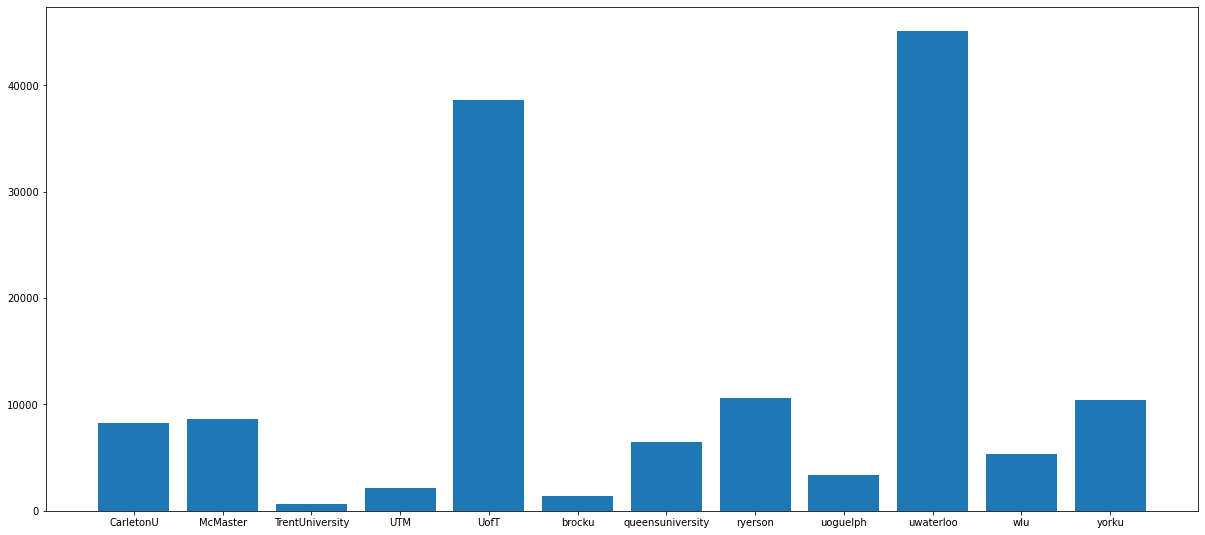

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['CarletonU', 'McMaster', 'TrentUniversity', 'UTM', 'UofT', 'brocku', 'queensuniversity', 'ryerson', 'uoguelph', 'uwaterloo', 'wlu', 'yorku']
ax.bar(langs, ss19)
fig.set_size_inches(16, 7)
plt.show()

In [55]:
ch1 = round(depressed_percentat20 - depressed_percentat19, 3)
ch2 = round(depressed_percentc20 - depressed_percentc19, 3)

In [93]:
unibesta19 = unititles19[-1]
uniworsta19 = unititles19[int(len(unititles19)/2)]
unibestc19 = unicomments19.sort_values(ascending=False)[-1]
uniworstc19 = unicomments19.sort_values(ascending=False)[int(len(unicomments19)/2)]

In [94]:
unibesta20 = unititles20[-1]
uniworsta20 = unititles20[int(len(unititles20)/2)]
unibestc20 = unicomments20.sort_values(ascending=False)[-1]
uniworstc20 = unicomments20.sort_values(ascending=False)[int(len(unicomments20)/2)]

In [124]:
uninumchange = round((s20.sort_values(ascending=False)[0] - s19.sort_values(ascending=False)[0])/s19.sort_values(ascending=False)[0]*100, 2)
uninumchange

43.31

# Conclusion

In [136]:
print(f'There was an overall increase of \033[1m{ch1}%\033[0m in emotionally depressed posts across communities of all universities ')

There was an overall increase of 0.741% in emotionally depressed posts across communities of all universities 


In [135]:
print(f'There was an overall increase of \033[1m{ch2}%\033[0m in emotionally depressed comments on the posts across communities of all universities ')

There was an overall increase of 0.977% in emotionally depressed comments on the posts across communities of all universities 


In [137]:
print(f'In 2019 the least emotionally depressed posts were posted in\n\033[1mBrock University as {unibesta19}% \033[0mof the total posts')

In 2019 the least emotionally depressed posts were posted in
Brock University as 37.382% of the total posts


In [138]:
print(f'In 2019 the most emotionally depressed posts were posted in\n\033[1mUniversity of Toronto Mississauga as {uniworsta19}% \033[0mof the total posts')

In 2019 the most emotionally depressed posts were posted in
University of Toronto Mississauga as 42.516% of the total posts


In [139]:
print(f'In 2019 the most emotionally depressed interactions took place in\n\033[1mThe University of Waterloo as {uniworstc19}% \033[0mof the total comments')

In 2019 the most emotionally depressed interactions took place in
The University of Waterloo as 42.253% of the total comments


In [142]:
print(f'In 2019 the least emotionally depressed interactions took place in\n\033[1mThe University of Gueplh as {unibestc19}% \033[0m of the total comments')

In 2019 the least emotionally depressed interactions took place in
The University of Gueplh as 36.336%  of the total comments


In [143]:
print(f'In 2020 the least emotionally depressed posts were posted in\n\033[1mBrock University as {unibesta20}% \033[0m of the total posts')

In 2020 the least emotionally depressed posts were posted in
Brock University as 35.273%  of the total posts


In [144]:
print(f'In 2020 the most emotionally depressed posts were posted in\n\033[1mMcMaster University as {uniworsta20}% \033[0mof the total posts')

In 2020 the most emotionally depressed posts were posted in
McMaster University as 43.516% of the total posts


In [145]:
print(f'In 2020 the most emotionally depressed interactions took place in\n\033[1mThe University of Waterloo as {uniworstc20}% \033[0mof the total comments')

In 2020 the most emotionally depressed interactions took place in
The University of Waterloo as 43.667% of the total comments


In [146]:
print(f'In 2020 the least emotionally depressed interactions took place in\n\033[1mTrent University as {unibestc20}% \033[0mof the total comments')

In 2020 the least emotionally depressed interactions took place in
Trent University as 34.81% of the total comments


In [149]:
print(f'Between the years 2020 and 2019, \033[1mUniversity of Waterloo"s\033[0m subreddit \nwas observed to get the highest gain in new subscribers with a \033[1m{uninumchange}% increase\033[0m')

Between the years 2020 and 2019, University of Waterloo"s subreddit 
was observed to get the highest gain in new subscribers with a 43.31% increase
